# <img src="datamaining.jpg">
# <center> <font color=darkblue>PROJET DATA MAINING</font></center>
<center> <font size='5px'>Enseignant: LOTFI BEN ROMDHANE ET KHEMAIS ABDALLAH</font></center>
<center> <font size='3px'>mariem romdhane 3DNI1</font></center>

In [1]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Exporter BL-Flickr-Images-Book.csv dans un data frame nomé df
pd.set_option('display.max_colwidth', 100)
df=pd.read_csv('tweets.csv',encoding='utf_8')
#df.head()
df.head()

,1338634877130792962,2020-12-14 23:59:59,0,0.1,"Although it's factually untrue, the way he is painting Hitler would make him an ally of Bibi's party founders, who https://t.co/Cq1LrtVvmL"
0,1338634877130788864,2020-12-14 23:59:59,0,411,RT @HeartofGulf_TH: Have a good dream see you tomorrow. # #GulfKanawut # https://t.co/rqvDhshtH8
1,1338634877126799360,2020-12-14 23:59:59,0,26306,RT @TokyosDemons: bro is struggling https://t.co/0wUOrp5o05
2,1338634877126778881,2020-12-14 23:59:59,0,0,Hypertension may cause poor communication between brain regions. A test that measures blood flow...
3,1338634877126778880,2020-12-14 23:59:59,1,0,107.29 daylight operations #waivers mitigate risk &amp; extend your team's capabilities. Are you...
4,1338634877122584578,2020-12-14 23:59:59,1,0,Duke is definitely getting fed up of me making him stand still for photos\n\n#letmeplay #Boxers ...


In [3]:
col_names = ['id','Timestamp','nombre de favoris','nombre de Retweet',
             'Tweets']

df = pd.read_csv(r'tweets.csv', names=col_names, header=None)
df.head()

,id,Timestamp,nombre de favoris,nombre de Retweet,Tweets
0,1338634877130792962,2020-12-14 23:59:59,0,0,"Although it's factually untrue, the way he is painting Hitler would make him an ally of Bibi's p..."
1,1338634877130788864,2020-12-14 23:59:59,0,411,RT @HeartofGulf_TH: Have a good dream see you tomorrow. # #GulfKanawut # https://t.co/rqvDhshtH8
2,1338634877126799360,2020-12-14 23:59:59,0,26306,RT @TokyosDemons: bro is struggling https://t.co/0wUOrp5o05
3,1338634877126778881,2020-12-14 23:59:59,0,0,Hypertension may cause poor communication between brain regions. A test that measures blood flow...
4,1338634877126778880,2020-12-14 23:59:59,1,0,107.29 daylight operations #waivers mitigate risk &amp; extend your team's capabilities. Are you...


In [4]:
col_names = ['id','Timestamp','nombre de favoris','nombre de Retweet',
             'Tweets']

df = pd.read_csv(r'tweets.csv', names=col_names, header=None)
df.head()

,id,Timestamp,nombre de favoris,nombre de Retweet,Tweets
0,1338634877130792962,2020-12-14 23:59:59,0,0,"Although it's factually untrue, the way he is painting Hitler would make him an ally of Bibi's p..."
1,1338634877130788864,2020-12-14 23:59:59,0,411,RT @HeartofGulf_TH: Have a good dream see you tomorrow. # #GulfKanawut # https://t.co/rqvDhshtH8
2,1338634877126799360,2020-12-14 23:59:59,0,26306,RT @TokyosDemons: bro is struggling https://t.co/0wUOrp5o05
3,1338634877126778881,2020-12-14 23:59:59,0,0,Hypertension may cause poor communication between brain regions. A test that measures blood flow...
4,1338634877126778880,2020-12-14 23:59:59,1,0,107.29 daylight operations #waivers mitigate risk &amp; extend your team's capabilities. Are you...


# Résumé de l'ensemble de données 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12433 entries, 0 to 12432
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 12433 non-null  int64 
 1   Timestamp          12433 non-null  object
 2   nombre de favoris  12433 non-null  int64 
 3   nombre de Retweet  12433 non-null  int64 
 4   Tweets             12433 non-null  object
dtypes: int64(3), object(2)
memory usage: 485.8+ KB


# Résumé statistique de la variable numérique

In [6]:
df.describe()

,id,nombre de favoris,nombre de Retweet
count,1.243300e+04,12433.000000,12433.000000
mean,1.338635e+18,1.544277,1850.308373
std,1.301722e+10,24.149946,7616.358738
min,1.338635e+18,0.000000,0.000000
25%,1.338635e+18,0.000000,0.000000
50%,1.338635e+18,0.000000,0.000000
75%,1.338635e+18,0.000000,117.000000
max,1.338635e+18,1557.000000,164327.000000


# Nombre des Features et Nombre des samples

In [7]:
df.shape

(12433, 5)

# Affichage des Tweets Plus clairement pour traiter ce qu'il faut faire pour  tweets cleaning

In [8]:
df['Tweets'].head(50)

0     Although it's factually untrue, the way he is painting Hitler would make him an ally of Bibi's p...
1       RT @HeartofGulf_TH: Have a good dream see you tomorrow.  # #GulfKanawut # https://t.co/rqvDhshtH8
2                                            RT @TokyosDemons: bro is struggling  https://t.co/0wUOrp5o05
3     Hypertension may cause poor communication between brain regions. A test that measures blood flow...
4     107.29 daylight operations #waivers mitigate risk &amp; extend your team's capabilities. Are you...
5     Duke is definitely getting fed up of me making him stand still for photos\n\n#letmeplay #Boxers ...
6                                      @ii_Turxles why do yall have to point that out everytime jiewfewfw
7     @RepPaulMitchell @realDonaldTrump @senatemajldr And what will be your legacy?\n\nIf you don't st...
8                     @yuzushiraishi spy base prefabs, probably vault and camera system, that's it, watch
9     RT @HashimeJam: trading twitter account 

In [9]:
#Dropping unnecessary columns
to_drop = ['nombre de favoris',
           'nombre de Retweet',
           'Timestamp']

#Eliminer les colonnes dans la liste de to_drop du dataframe df
df.drop(to_drop, inplace=True, axis=1)

#Afficherle résultat
df.head()

,id,Tweets
0,1338634877130792962,"Although it's factually untrue, the way he is painting Hitler would make him an ally of Bibi's p..."
1,1338634877130788864,RT @HeartofGulf_TH: Have a good dream see you tomorrow. # #GulfKanawut # https://t.co/rqvDhshtH8
2,1338634877126799360,RT @TokyosDemons: bro is struggling https://t.co/0wUOrp5o05
3,1338634877126778881,Hypertension may cause poor communication between brain regions. A test that measures blood flow...
4,1338634877126778880,107.29 daylight operations #waivers mitigate risk &amp; extend your team's capabilities. Are you...


In [10]:
###Changerl'index 
df.set_index('id', inplace=True)

###Afficher le résultat
df.head()

,Tweets
id,
1338634877130792962,"Although it's factually untrue, the way he is painting Hitler would make him an ally of Bibi's p..."
1338634877130788864,RT @HeartofGulf_TH: Have a good dream see you tomorrow. # #GulfKanawut # https://t.co/rqvDhshtH8
1338634877126799360,RT @TokyosDemons: bro is struggling https://t.co/0wUOrp5o05
1338634877126778881,Hypertension may cause poor communication between brain regions. A test that measures blood flow...
1338634877126778880,107.29 daylight operations #waivers mitigate risk &amp; extend your team's capabilities. Are you...


In [11]:
#cleaning tweets
#create function to clean the tweets
def cleaningtweet(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+', '',tweet)#remove @username
    tweet = re.sub(r'#', '',tweet)#removehatshtags
    tweet = re.sub(r'RT[\s]+', '',tweet)#remove retweets
    tweet = re.sub(r'https?:\/\/\S+', '',tweet)#remove URLs
    return tweet

In [12]:
df['Tweets'] = df['Tweets'].apply(cleaningtweet)

In [13]:
df.head(50)

,Tweets
id,
1338634877130792962,"Although it's factually untrue, the way he is painting Hitler would make him an ally of Bibi's p..."
1338634877130788864,_TH: Have a good dream see you tomorrow. GulfKanawut
1338634877126799360,: bro is struggling
1338634877126778881,Hypertension may cause poor communication between brain regions. A test that measures blood flow...
1338634877126778880,107.29 daylight operations waivers mitigate risk &amp; extend your team's capabilities. Are you ...
1338634877122584578,Duke is definitely getting fed up of me making him stand still for photos\n\nletmeplay Boxers do...
1338634877122568192,_Turxles why do yall have to point that out everytime jiewfewfw
1338634877114191873,"And what will be your legacy?\n\nIf you don't stand for something, yo"
1338634877114134528,"spy base prefabs, probably vault and camera system, that's it, watch"


# remove le caracter b au debut de chaque Tweet.


In [14]:
def remove_first_n_char(org_str):
    """ Return a string by deleting first n
    characters from the string """
    mod_string = ""
    for i in range(1, len(org_str)):
        mod_string = mod_string + org_str[i]
    return mod_string

In [15]:

df['Tweets'] = df['Tweets'].apply(remove_first_n_char)


In [16]:
df.head(50)

,Tweets
id,
1338634877130792962,"lthough it's factually untrue, the way he is painting Hitler would make him an ally of Bibi's pa..."
1338634877130788864,TH: Have a good dream see you tomorrow. GulfKanawut
1338634877126799360,bro is struggling
1338634877126778881,ypertension may cause poor communication between brain regions. A test that measures blood flow ...
1338634877126778880,07.29 daylight operations waivers mitigate risk &amp; extend your team's capabilities. Are you r...
1338634877122584578,uke is definitely getting fed up of me making him stand still for photos\n\nletmeplay Boxers dog...
1338634877122568192,Turxles why do yall have to point that out everytime jiewfewfw
1338634877114191873,"And what will be your legacy?\n\nIf you don't stand for something, yo"
1338634877114134528,"spy base prefabs, probably vault and camera system, that's it, watch"


In [17]:
df.shape

(12433, 1)

# remove ponctuation

In [18]:
"I am Student" == "I am Student."

False

In [19]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# removing html


In [20]:
def remove_html(text):
    html=re.compile(r"<.*?>")
    return html.sub(r"", text)

In [21]:
df['Tweets'] = df['Tweets'].apply(remove_html)
df.head()

,Tweets
id,
1338634877130792962,"lthough it's factually untrue, the way he is painting Hitler would make him an ally of Bibi's pa..."
1338634877130788864,TH: Have a good dream see you tomorrow. GulfKanawut
1338634877126799360,bro is struggling
1338634877126778881,ypertension may cause poor communication between brain regions. A test that measures blood flow ...
1338634877126778880,07.29 daylight operations waivers mitigate risk &amp; extend your team's capabilities. Are you r...


# removing emojs

In [22]:
import re
import sys

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


In [23]:
df['Tweets'] = df['Tweets'].apply(remove_emoji)
df.head()

,Tweets
id,
1338634877130792962,"lthough it's factually untrue, the way he is painting Hitler would make him an ally of Bibi's pa..."
1338634877130788864,TH: Have a good dream see you tomorrow. GulfKanawut
1338634877126799360,bro is struggling
1338634877126778881,ypertension may cause poor communication between brain regions. A test that measures blood flow ...
1338634877126778880,07.29 daylight operations waivers mitigate risk &amp; extend your team's capabilities. Are you r...


In [24]:
def remove_punctuation(txt):
    txt_nopunct="".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [25]:
df['Tweets'] = df['Tweets'].apply(remove_punctuation)
df.head()

,Tweets
id,
1338634877130792962,lthough its factually untrue the way he is painting Hitler would make him an ally of Bibis party...
1338634877130788864,TH Have a good dream see you tomorrow GulfKanawut
1338634877126799360,bro is struggling
1338634877126778881,ypertension may cause poor communication between brain regions A test that measures blood flow c...
1338634877126778880,0729 daylight operations waivers mitigate risk amp extend your teams capabilities Are you ready ...


# Deleting dupliate headlines(if any)

In [26]:
df.shape

(12433, 1)

In [27]:
df[df['Tweets'].duplicated(keep=False)].sort_values('Tweets')
df= df.drop_duplicates('Tweets')

In [28]:
df.shape

(11336, 1)

# remove \n et \r et chnager uppercase par lowercase

In [29]:
def cleaning(tweet):
    tweet = re.sub('\\r*\\n*\\\\*', '', tweet)
    tweet = tweet.lower()
    
    return tweet

In [30]:
df['Tweets'] = df['Tweets'].apply(cleaning)
df['Tweets'].head(50)

id
1338634877130792962    lthough its factually untrue the way he is painting hitler would make him an ally of bibis party...
1338634877130788864                                                  th have a good dream see you tomorrow   gulfkanawut  
1338634877126799360                                                                                    bro is struggling  
1338634877126778881    ypertension may cause poor communication between brain regions a test that measures blood flow c...
1338634877126778880    0729 daylight operations waivers mitigate risk amp extend your teams capabilities are you ready ...
1338634877122584578    uke is definitely getting fed up of me making him stand still for photosletmeplay boxers dogs do...
1338634877122568192                                         turxles why do yall have to point that out everytime jiewfewfw
1338634877114191873                                        and what will be your legacyif you dont stand for something yo 
1338634877114

# remove les nombres

In [31]:
unwanted_characters = ['0', '1', '2','3','4', '5', '6','7','8','9']

def clean_data(dop):
    for character in unwanted_characters:
        if character in dop:
            character_index = dop.find(character)
            dop = dop[:character_index]
    return dop
df['Tweets'] = df['Tweets'].apply(clean_data)
df['Tweets'].head(50)

id
1338634877130792962    lthough its factually untrue the way he is painting hitler would make him an ally of bibis party...
1338634877130788864                                                  th have a good dream see you tomorrow   gulfkanawut  
1338634877126799360                                                                                    bro is struggling  
1338634877126778881    ypertension may cause poor communication between brain regions a test that measures blood flow c...
1338634877126778880                                                                                                       
1338634877122584578    uke is definitely getting fed up of me making him stand still for photosletmeplay boxers dogs do...
1338634877122568192                                         turxles why do yall have to point that out everytime jiewfewfw
1338634877114191873                                        and what will be your legacyif you dont stand for something yo 
1338634877114

# spelling

In [39]:
from textblob import Word
from textblob import TextBlob
def spelling(a):
    b = TextBlob(a)
    return b.correct()
print(spelling("lthough"))
df["Tweets-spelling"] = df["Tweets"].apply(lambda text: spelling(text))
df.head(5)

though


,Tweets,tweets_tokens,tweets_stop,tweet_frequency,Tweets-spelling
id,,,,,
1338634877130792962,lthough its factually untrue the way he is painting hitler would make him an ally of bibis party...,"[lthough, its, factually, untrue, the, way, he, is, painting, hitler, would, make, him, an, ally...","['lthough', 'its', 'factually', 'untrue', 'the', 'way', 'he', 'is', 'painting', 'hitler', 'would...","['lthough', 'its', 'factually', 'untrue', 'way', 'he', 'painting', 'hitler', 'would', 'make', 'h...","(t, h, o, u, g, h, , i, t, s, , a, c, t, u, a, l, l, y, , u, n, t, r, u, e, , t, h, e, , w,..."
1338634877130788864,th have a good dream see you tomorrow gulfkanawut,"[th, have, a, good, dream, see, you, tomorrow, gulfkanawut]","['th', 'have', 'a', 'good', 'dream', 'see', 'you', 'tomorrow', 'gulfkanawut']","['th', 'have', 'good', 'dream', 'see', 'tomorrow', 'gulfkanawut']","(t, h, , h, a, v, e, , a, , g, o, o, d, , d, r, e, a, m, , s, e, e, , y, o, u, , t, o, m,..."
1338634877126799360,bro is struggling,"[bro, is, struggling]","['bro', 'is', 'struggling']","['bro', 'struggling']","( , b, r, o, w, , i, s, , s, t, r, u, g, g, l, i, n, g, , )"
1338634877126778881,ypertension may cause poor communication between brain regions a test that measures blood flow c...,"[ypertension, may, cause, poor, communication, between, brain, regions, a, test, that, measures,...","['ypertension', 'may', 'cause', 'poor', 'communication', 'between', 'brain', 'regions', 'a', 'te...","['ypertension', 'may', 'cause', 'poor', 'communication', 'between', 'brain', 'regions', 'test', ...","(p, r, e, t, e, n, s, i, o, n, , m, a, y, , c, a, u, s, e, , p, o, o, r, , c, o, m, m, u, n,..."
1338634877126778880,,[],[],[],()


In [42]:
from textblob import Word
from textblob import TextBlob
def spelling(a):
    b = TextBlob(a)
    return "".join(b.correct())
print(spelling("lthough"))
df["Tweets-spell"] = df["Tweets"].apply(lambda text: spelling(text))
df.head(5)

though


,Tweets,tweets_tokens,tweets_stop,tweet_frequency,Tweets-spelling,Tweets-spell
id,,,,,,
1338634877130792962,lthough its factually untrue the way he is painting hitler would make him an ally of bibis party...,"[lthough, its, factually, untrue, the, way, he, is, painting, hitler, would, make, him, an, ally...","['lthough', 'its', 'factually', 'untrue', 'the', 'way', 'he', 'is', 'painting', 'hitler', 'would...","['lthough', 'its', 'factually', 'untrue', 'way', 'he', 'painting', 'hitler', 'would', 'make', 'h...","(t, h, o, u, g, h, , i, t, s, , a, c, t, u, a, l, l, y, , u, n, t, r, u, e, , t, h, e, , w,...",though its actually untrue the way he is painting hither would make him an ally of boris party f...
1338634877130788864,th have a good dream see you tomorrow gulfkanawut,"[th, have, a, good, dream, see, you, tomorrow, gulfkanawut]","['th', 'have', 'a', 'good', 'dream', 'see', 'you', 'tomorrow', 'gulfkanawut']","['th', 'have', 'good', 'dream', 'see', 'tomorrow', 'gulfkanawut']","(t, h, , h, a, v, e, , a, , g, o, o, d, , d, r, e, a, m, , s, e, e, , y, o, u, , t, o, m,...",th have a good dream see you tomorrow gulfkanawut
1338634877126799360,bro is struggling,"[bro, is, struggling]","['bro', 'is', 'struggling']","['bro', 'struggling']","( , b, r, o, w, , i, s, , s, t, r, u, g, g, l, i, n, g, , )",brow is struggling
1338634877126778881,ypertension may cause poor communication between brain regions a test that measures blood flow c...,"[ypertension, may, cause, poor, communication, between, brain, regions, a, test, that, measures,...","['ypertension', 'may', 'cause', 'poor', 'communication', 'between', 'brain', 'regions', 'a', 'te...","['ypertension', 'may', 'cause', 'poor', 'communication', 'between', 'brain', 'regions', 'test', ...","(p, r, e, t, e, n, s, i, o, n, , m, a, y, , c, a, u, s, e, , p, o, o, r, , c, o, m, m, u, n,...",pretension may cause poor communication between brain regions a test that measures blood flow ch...
1338634877126778880,,[],[],[],(),


# chat word elemniation

# NLP
Preparing data for vectorizaion

# stop words

Suppression de tous les mots insignifiants dans les observations. C'est ce qu'on appelle les mots vides(stop words).Dans ce cas, il existe une bibliothèque fournie par nltk (natural language tool kit).

In [32]:
import nltk
import string                             
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer  
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RIMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
stopwords = nltk.corpus.stopwords.words('english')

print('Stop words\n')
print(stopwords)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

# Tokenize

In [34]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RIMA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
from nltk import word_tokenize
def nltk_tokenise(text):
    tokens=word_tokenize(text)
    return tokens
df['tweets_tokens'] = df['Tweets'].apply(lambda x: nltk_tokenise(x))
df.head()

,Tweets,tweets_tokens
id,,
1338634877130792962,lthough its factually untrue the way he is painting hitler would make him an ally of bibis party...,"[lthough, its, factually, untrue, the, way, he, is, painting, hitler, would, make, him, an, ally..."
1338634877130788864,th have a good dream see you tomorrow gulfkanawut,"[th, have, a, good, dream, see, you, tomorrow, gulfkanawut]"
1338634877126799360,bro is struggling,"[bro, is, struggling]"
1338634877126778881,ypertension may cause poor communication between brain regions a test that measures blood flow c...,"[ypertension, may, cause, poor, communication, between, brain, regions, a, test, that, measures,..."
1338634877126778880,,[]


# remove stop words 

In [36]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])

df["tweets_stop"] = df["tweets_tokens"].apply(lambda text: remove_stopwords(text))
df.head()


,Tweets,tweets_tokens,tweets_stop
id,,,
1338634877130792962,lthough its factually untrue the way he is painting hitler would make him an ally of bibis party...,"[lthough, its, factually, untrue, the, way, he, is, painting, hitler, would, make, him, an, ally...","['lthough', 'its', 'factually', 'untrue', 'the', 'way', 'he', 'is', 'painting', 'hitler', 'would..."
1338634877130788864,th have a good dream see you tomorrow gulfkanawut,"[th, have, a, good, dream, see, you, tomorrow, gulfkanawut]","['th', 'have', 'a', 'good', 'dream', 'see', 'you', 'tomorrow', 'gulfkanawut']"
1338634877126799360,bro is struggling,"[bro, is, struggling]","['bro', 'is', 'struggling']"
1338634877126778881,ypertension may cause poor communication between brain regions a test that measures blood flow c...,"[ypertension, may, cause, poor, communication, between, brain, regions, a, test, that, measures,...","['ypertension', 'may', 'cause', 'poor', 'communication', 'between', 'brain', 'regions', 'a', 'te..."
1338634877126778880,,[],[]


In [37]:
from collections import Counter
cnt = Counter()
for text in df["tweets_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[("'the',", 3242),
 ("'to',", 2422),
 ("'a',", 1986),
 ("'i',", 1707),
 ("'and',", 1638),
 ("'of',", 1428),
 ("'is',", 1422),
 ("'you',", 1383),
 ("'in',", 1170),
 ("'for',", 1059)]

In [38]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["tweet_frequency"] = df["tweets_stop"].apply(lambda text: remove_freqwords(text))
df.head()

,Tweets,tweets_tokens,tweets_stop,tweet_frequency
id,,,,
1338634877130792962,lthough its factually untrue the way he is painting hitler would make him an ally of bibis party...,"[lthough, its, factually, untrue, the, way, he, is, painting, hitler, would, make, him, an, ally...","['lthough', 'its', 'factually', 'untrue', 'the', 'way', 'he', 'is', 'painting', 'hitler', 'would...","['lthough', 'its', 'factually', 'untrue', 'way', 'he', 'painting', 'hitler', 'would', 'make', 'h..."
1338634877130788864,th have a good dream see you tomorrow gulfkanawut,"[th, have, a, good, dream, see, you, tomorrow, gulfkanawut]","['th', 'have', 'a', 'good', 'dream', 'see', 'you', 'tomorrow', 'gulfkanawut']","['th', 'have', 'good', 'dream', 'see', 'tomorrow', 'gulfkanawut']"
1338634877126799360,bro is struggling,"[bro, is, struggling]","['bro', 'is', 'struggling']","['bro', 'struggling']"
1338634877126778881,ypertension may cause poor communication between brain regions a test that measures blood flow c...,"[ypertension, may, cause, poor, communication, between, brain, regions, a, test, that, measures,...","['ypertension', 'may', 'cause', 'poor', 'communication', 'between', 'brain', 'regions', 'a', 'te...","['ypertension', 'may', 'cause', 'poor', 'communication', 'between', 'brain', 'regions', 'test', ..."
1338634877126778880,,[],[],[]


# Stemming 

Stemming (La tige) est également une bonne pratique car elle consiste à réduire un mot à sa forme racine. Par exemple, le mot détenu peut être réduit à détenir ou à une forme encore plus simple.

In [59]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
# dir(porter_stemmer)

In [60]:
def stemming(tokenized_text):
    text = "".join([porter_stemmer.stem(word) for word in tokenized_text])
    return text

In [61]:
df['tweets_stemmed'] = df['tweets_tokens'].apply(lambda x: stemming(x))
df.head()

,Tweets,tweets_tokens,tweets_stop,tweet_frequency,Tweets-spelling,Tweets-spell,tweets_stemmed
id,,,,,,,
1338634877130792962,lthough its factually untrue the way he is painting hitler would make him an ally of bibis party...,"[lthough, its, factually, untrue, the, way, he, is, painting, hitler, would, make, him, an, ally...","['lthough', 'its', 'factually', 'untrue', 'the', 'way', 'he', 'is', 'painting', 'hitler', 'would...","['lthough', 'its', 'factually', 'untrue', 'way', 'he', 'painting', 'hitler', 'would', 'make', 'h...","(t, h, o, u, g, h, , i, t, s, , a, c, t, u, a, l, l, y, , u, n, t, r, u, e, , t, h, e, , w,...",though its actually untrue the way he is painting hither would make him an ally of boris party f...,lthoughitfactualuntruthewayheispainthitlerwouldmakehimanalliofbibipartifounderwho
1338634877130788864,th have a good dream see you tomorrow gulfkanawut,"[th, have, a, good, dream, see, you, tomorrow, gulfkanawut]","['th', 'have', 'a', 'good', 'dream', 'see', 'you', 'tomorrow', 'gulfkanawut']","['th', 'have', 'good', 'dream', 'see', 'tomorrow', 'gulfkanawut']","(t, h, , h, a, v, e, , a, , g, o, o, d, , d, r, e, a, m, , s, e, e, , y, o, u, , t, o, m,...",th have a good dream see you tomorrow gulfkanawut,thhaveagooddreamseeyoutomorrowgulfkanawut
1338634877126799360,bro is struggling,"[bro, is, struggling]","['bro', 'is', 'struggling']","['bro', 'struggling']","( , b, r, o, w, , i, s, , s, t, r, u, g, g, l, i, n, g, , )",brow is struggling,broisstruggl
1338634877126778881,ypertension may cause poor communication between brain regions a test that measures blood flow c...,"[ypertension, may, cause, poor, communication, between, brain, regions, a, test, that, measures,...","['ypertension', 'may', 'cause', 'poor', 'communication', 'between', 'brain', 'regions', 'a', 'te...","['ypertension', 'may', 'cause', 'poor', 'communication', 'between', 'brain', 'regions', 'test', ...","(p, r, e, t, e, n, s, i, o, n, , m, a, y, , c, a, u, s, e, , p, o, o, r, , c, o, m, m, u, n,...",pretension may cause poor communication between brain regions a test that measures blood flow ch...,ypertensmaycauspoorcommunbetweenbrainregionatestthatmeasurbloodflowchanginthebra
1338634877126778880,,[],[],[],(),,


# Lemmatization

Lemmatization est similaire à la radicalisation, mais elle apporte un contexte aux mots et va donc plus loin en reliant des mots ayant une signification similaire à un mot.

In [62]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RIMA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [63]:
# WordNet lexical database for lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatization(token_txt):
    text = "".join([wordnet_lemmatizer.lemmatize(word) for word in token_txt])
    return text
df['Tweets_lemmatized'] = df['Tweets'].apply(lambda x : lemmatization(x))
df.head()

,Tweets,tweets_tokens,tweets_stop,tweet_frequency,Tweets-spelling,Tweets-spell,tweets_stemmed,Tweets_lemmatized
id,,,,,,,,
1338634877130792962,lthough its factually untrue the way he is painting hitler would make him an ally of bibis party...,"[lthough, its, factually, untrue, the, way, he, is, painting, hitler, would, make, him, an, ally...","['lthough', 'its', 'factually', 'untrue', 'the', 'way', 'he', 'is', 'painting', 'hitler', 'would...","['lthough', 'its', 'factually', 'untrue', 'way', 'he', 'painting', 'hitler', 'would', 'make', 'h...","(t, h, o, u, g, h, , i, t, s, , a, c, t, u, a, l, l, y, , u, n, t, r, u, e, , t, h, e, , w,...",though its actually untrue the way he is painting hither would make him an ally of boris party f...,lthoughitfactualuntruthewayheispainthitlerwouldmakehimanalliofbibipartifounderwho,lthough its factually untrue the way he is painting hitler would make him an ally of bibis party...
1338634877130788864,th have a good dream see you tomorrow gulfkanawut,"[th, have, a, good, dream, see, you, tomorrow, gulfkanawut]","['th', 'have', 'a', 'good', 'dream', 'see', 'you', 'tomorrow', 'gulfkanawut']","['th', 'have', 'good', 'dream', 'see', 'tomorrow', 'gulfkanawut']","(t, h, , h, a, v, e, , a, , g, o, o, d, , d, r, e, a, m, , s, e, e, , y, o, u, , t, o, m,...",th have a good dream see you tomorrow gulfkanawut,thhaveagooddreamseeyoutomorrowgulfkanawut,th have a good dream see you tomorrow gulfkanawut
1338634877126799360,bro is struggling,"[bro, is, struggling]","['bro', 'is', 'struggling']","['bro', 'struggling']","( , b, r, o, w, , i, s, , s, t, r, u, g, g, l, i, n, g, , )",brow is struggling,broisstruggl,bro is struggling
1338634877126778881,ypertension may cause poor communication between brain regions a test that measures blood flow c...,"[ypertension, may, cause, poor, communication, between, brain, regions, a, test, that, measures,...","['ypertension', 'may', 'cause', 'poor', 'communication', 'between', 'brain', 'regions', 'a', 'te...","['ypertension', 'may', 'cause', 'poor', 'communication', 'between', 'brain', 'regions', 'test', ...","(p, r, e, t, e, n, s, i, o, n, , m, a, y, , c, a, u, s, e, , p, o, o, r, , c, o, m, m, u, n,...",pretension may cause poor communication between brain regions a test that measures blood flow ch...,ypertensmaycauspoorcommunbetweenbrainregionatestthatmeasurbloodflowchanginthebra,ypertension may cause poor communication between brain regions a test that measures blood flow c...
1338634877126778880,,[],[],[],(),,,


In [64]:
df['Tweets_clean'] = df['Tweets'].apply(stemming)
df['Tweets_clean'] = df['Tweets_clean'].apply(lemmatization)
df.head(50)

,Tweets,tweets_tokens,tweets_stop,tweet_frequency,Tweets-spelling,Tweets-spell,tweets_stemmed,Tweets_lemmatized,Tweets_clean
id,,,,,,,,,
1338634877130792962,lthough its factually untrue the way he is painting hitler would make him an ally of bibis party...,"[lthough, its, factually, untrue, the, way, he, is, painting, hitler, would, make, him, an, ally...","['lthough', 'its', 'factually', 'untrue', 'the', 'way', 'he', 'is', 'painting', 'hitler', 'would...","['lthough', 'its', 'factually', 'untrue', 'way', 'he', 'painting', 'hitler', 'would', 'make', 'h...","(t, h, o, u, g, h, , i, t, s, , a, c, t, u, a, l, l, y, , u, n, t, r, u, e, , t, h, e, , w,...",though its actually untrue the way he is painting hither would make him an ally of boris party f...,lthoughitfactualuntruthewayheispainthitlerwouldmakehimanalliofbibipartifounderwho,lthough its factually untrue the way he is painting hitler would make him an ally of bibis party...,lthough its factually untrue the way he is painting hitler would make him an ally of bibis party...
1338634877130788864,th have a good dream see you tomorrow gulfkanawut,"[th, have, a, good, dream, see, you, tomorrow, gulfkanawut]","['th', 'have', 'a', 'good', 'dream', 'see', 'you', 'tomorrow', 'gulfkanawut']","['th', 'have', 'good', 'dream', 'see', 'tomorrow', 'gulfkanawut']","(t, h, , h, a, v, e, , a, , g, o, o, d, , d, r, e, a, m, , s, e, e, , y, o, u, , t, o, m,...",th have a good dream see you tomorrow gulfkanawut,thhaveagooddreamseeyoutomorrowgulfkanawut,th have a good dream see you tomorrow gulfkanawut,th have a good dream see you tomorrow gulfkanawut
1338634877126799360,bro is struggling,"[bro, is, struggling]","['bro', 'is', 'struggling']","['bro', 'struggling']","( , b, r, o, w, , i, s, , s, t, r, u, g, g, l, i, n, g, , )",brow is struggling,broisstruggl,bro is struggling,bro is struggling
1338634877126778881,ypertension may cause poor communication between brain regions a test that measures blood flow c...,"[ypertension, may, cause, poor, communication, between, brain, regions, a, test, that, measures,...","['ypertension', 'may', 'cause', 'poor', 'communication', 'between', 'brain', 'regions', 'a', 'te...","['ypertension', 'may', 'cause', 'poor', 'communication', 'between', 'brain', 'regions', 'test', ...","(p, r, e, t, e, n, s, i, o, n, , m, a, y, , c, a, u, s, e, , p, o, o, r, , c, o, m, m, u, n,...",pretension may cause poor communication between brain regions a test that measures blood flow ch...,ypertensmaycauspoorcommunbetweenbrainregionatestthatmeasurbloodflowchanginthebra,ypertension may cause poor communication between brain regions a test that measures blood flow c...,ypertension may cause poor communication between brain regions a test that measures blood flow c...
1338634877126778880,,[],[],[],(),,,,
1338634877122584578,uke is definitely getting fed up of me making him stand still for photosletmeplay boxers dogs do...,"[uke, is, definitely, getting, fed, up, of, me, making, him, stand, still, for, photosletmeplay,...","['uke', 'is', 'definitely', 'getting', 'fed', 'up', 'of', 'me', 'making', 'him', 'stand', 'still...","['uke', 'definitely', 'getting', 'fed', 'up', 'me', 'making', 'him', 'stand', 'still', 'photosle...","(u, s, e, , i, s, , d, e, f, i, n, i, t, e, l, y, , g, e, t, t, i, n, g, , f, e, d, , u, p,...",use is definitely getting fed up of me making him stand still for photosletmeplay boxers dogs do...,ukeisdefinitgetfedupofmemakehimstandstillforphotosletmeplayboxerdogdogsoftwitt,uke is definitely getting fed up of me making him stand still for photosletmeplay boxers dogs do...,uke is definitely getting fed up of me making him stand still for photosletmeplay boxers dogs do...
1338634877122568192,turxles why do yall have to point that out everytime jiewfewfw,"[turxles, why, do, yall, have, to, point, that, out, everytime, jiewfewfw]","['turxles', 'why', 'do', 'yall', 'have', 'to', 'point', 'that', 'out', 'everytime', 'jiewfewfw']","['turxles', 'why', 'do', 'yall', 'have', 

In [65]:
df['Tweets_clean'].head(50)

id
1338634877130792962    lthough its factually untrue the way he is painting hitler would make him an ally of bibis party...
1338634877130788864                                                  th have a good dream see you tomorrow   gulfkanawut  
1338634877126799360                                                                                    bro is struggling  
1338634877126778881    ypertension may cause poor communication between brain regions a test that measures blood flow c...
1338634877126778880                                                                                                       
1338634877122584578    uke is definitely getting fed up of me making him stand still for photosletmeplay boxers dogs do...
1338634877122568192                                         turxles why do yall have to point that out everytime jiewfewfw
1338634877114191873                                        and what will be your legacyif you dont stand for something yo 
1338634877114

# Vectorization

Processus de codage du texte sous forme d'entiers pour créer des vecteurs de caractéristiques.

Feature Vector: vecteur de caractéristiques numériques qui représentent un objet

Types de vectorisation:

<br>1-Count Vectorization</br>
<br>2-N-grams</br>
<br>3-TF-IDF</br>
<br>nous avons choisi Count Vectorization</br>
<br>Le vectoriseur peut être un vectoriseur de comptage ou un vectoriseur TFIDF. Le Count Vectorization compte simplement l'instance / fréquence d'un mot dans une observation entière tandis qu'un vectoriseur TFIDF compte la «fraction» du temps où il se produit dans une observation entière lorsque sa valeur augmente proportionnellement au comptage.</br>

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 800,
    stop_words = 'english'
)
tfidf.fit(df.Tweets_lemmatized)
text = tfidf.transform(df.Tweets_lemmatized)
print(text)

  (0, 747)	0.5537110521620695
  (0, 506)	0.6483137425369989
  (0, 435)	0.5225833540701845
  (1, 688)	0.5140729806823998
  (1, 662)	0.5246438117020135
  (1, 276)	0.3750431502012019
  (1, 171)	0.5655267251529797
  (2, 75)	1.0
  (3, 93)	0.6587536767407629
  (3, 71)	0.7523586866518697
  (5, 437)	0.6081352187036242
  (5, 262)	0.5237470824581257
  (5, 152)	0.5965404842832516
  (6, 788)	0.6484872630187188
  (6, 528)	0.7612255051576312
  (7, 794)	0.8400106841092001
  (7, 168)	0.5425698577901226
  (8, 744)	0.5870054535643509
  (8, 665)	0.49574059891053374
  (8, 538)	0.6400514479926876
  (9, 708)	0.6623973704092929
  (9, 3)	0.7491526704716829
  (10, 720)	1.0
  (11, 213)	1.0
  (12, 401)	0.48637569738402336
  :	:
  (11323, 63)	0.4350375536391474
  (11324, 426)	1.0
  (11325, 717)	0.5867434163469561
  (11325, 466)	0.5580898912782823
  (11325, 78)	0.5867434163469561
  (11326, 531)	0.7012333884728624
  (11326, 284)	0.7129317883857247
  (11328, 782)	0.523112029663628
  (11328, 767)	0.5097109823069803
 

In [68]:
print(tfidf.get_feature_names())

['able', 'absolutely', 'abt', 'account', 'achievement', 'act', 'action', 'actually', 'ad', 'administration', 'af', 'ag', 'age', 'ago', 'agree', 'aint', 'air', 'album', 'amazing', 'america', 'american', 'americans', 'amn', 'amp', 'answer', 'anxiety', 'anymore', 'app', 'appreciate', 'arent', 'art', 'article', 'artist', 'ask', 'asked', 'asking', 'ass', 'ate', 'attention', 'attorney', 'away', 'awesome', 'baby', 'bad', 'ball', 'barr', 'barrs', 'bc', 'beat', 'beautiful', 'believe', 'ben', 'best', 'bet', 'better', 'biden', 'bidens', 'big', 'biggest', 'birthday', 'bit', 'bitch', 'bitches', 'black', 'block', 'blue', 'body', 'book', 'bout', 'boy', 'boys', 'brain', 'break', 'breaking', 'bring', 'bro', 'broke', 'brother', 'brown', 'bruh', 'bts', 'business', 'busy', 'buy', 'called', 'calling', 'came', 'car', 'card', 'care', 'case', 'cast', 'cat', 'cause', 'chance', 'change', 'changed', 'character', 'characters', 'chat', 'check', 'child', 'children', 'china', 'choose', 'chris', 'christmas', 'city', 

In [69]:
idf_df=pd.DataFrame(text.toarray())
idf_df

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11331,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
11332,0.501294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
11333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.601424,0.0
11334,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


# Trouver des clusters optimaux

Le clustering est une opération non supervisée et KMeans nécessite que nous spécifions le nombre de clusters. Une approche simple consiste à tracer le SSE pour une plage de tailles de cluster. Nous recherchons le «coude» où l'ESS commence à se stabiliser. MiniBatchKMeans introduit du bruit, j'ai donc augmenté la taille des lots et des init. Malheureusement, la mise en œuvre régulière de Kmeans est trop lente. Vous remarquerez que différents états aléatoires généreront différents graphiques. Ici, j'ai choisi 14 clusters.

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters


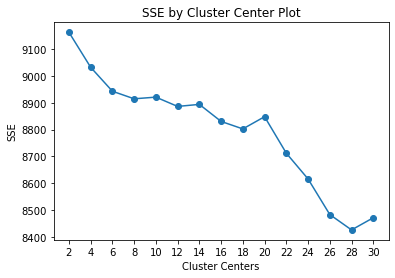

In [70]:
from sklearn.cluster import MiniBatchKMeans
def find_optimal_clusters(df, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(df).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 30)

# distance de jaccard

In [77]:
clusters = MiniBatchKMeans(n_clusters=29, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

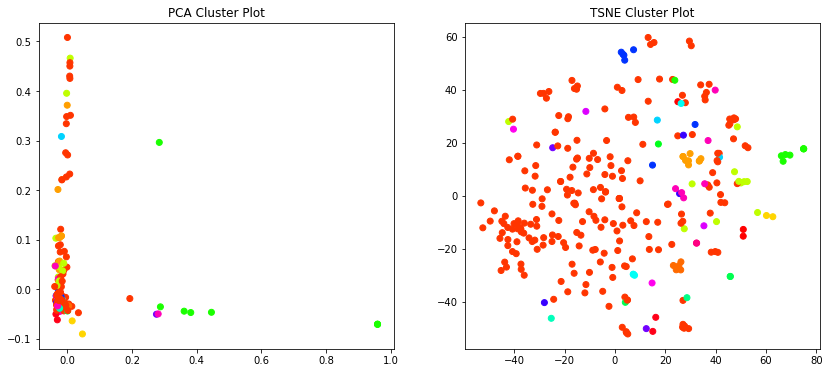

In [78]:
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [79]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
night,going,news,people,just,like,thats,im,luck,good

Cluster 1
got,thats,new,did,people,think,want,time,dont,just

Cluster 2
months,think,believe,hope,probably,like,really,just,dont,lol

Cluster 3
let,feel,like,im,ou,didnt,think,just,dont,know

Cluster 4
wont,things,man,wanna,going,want,like,im,dont,love

Cluster 5
thanks,room,national,sucks,wanna,hate,bro,getting,cat,sick

Cluster 6
ive,look,really,looks,want,feel,people,just,dont,like

Cluster 7
people,amp,special,lost,amazing,states,presidentelect,fall,proud,congratulations

Cluster 8
fight,want,time,know,shit,thing,im,oh,thats,yeah

Cluster 9
right,doing,think,thats,rn,gonna,going,just,sorry,im

Cluster 10
club,shit,people,yall,really,need,feel,idea,wanna,bad

Cluster 11
guys,omg,hi,best,lt,im,really,work,love,thank

Cluster 12
join,stop,love,getting,america,people,just,im,like,amp

Cluster 13
amp,dm,lets,fan,did,giveaway,likes,ig,train,follow

Cluster 14
high,know,good,life,just,fucking,love,thank,oh,god

Cluster 15
ju

In [ ]:

# Load the extension
%load_ext watermark

# import your libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import MiniBatchKMeans
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from collections import Counter
from nltk import word_tokenize
import nltk
import string                             
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer 
from textblob import Word
from textblob import TextBlob
import re
import sys
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
# Determine the dependency version
%watermark -v -m -p numpy,matplotlib,pandas,watermark,seaborn
%watermark -u -n -t -z